## Тема “Обучение без учителя”
### Задание 1
- Импортируйте библиотеки pandas, numpy и matplotlib. Загрузите "Boston House Prices dataset" из встроенных наборов  данных библиотеки sklearn. - Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
- Масштабируйте данные с помощью StandardScaler.
- Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42. Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',	'DIS', 'RAD',	'TAX', 'PTRATIO', 'B', 'LSTAT']
X = pd.DataFrame(data, columns=feature_names)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
y = pd.DataFrame(target, columns=["price"])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [8]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

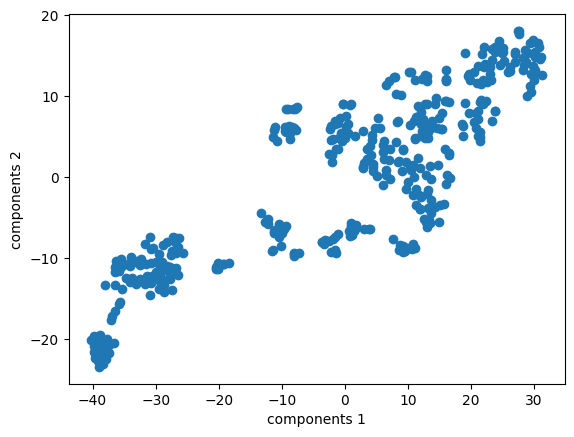

In [9]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.xlabel('components 1')
plt.ylabel('components 2')
plt.show()

### Задание 2
- С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
- Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
- Вычислите средние значения price и CRIM в разных кластерах.

In [10]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


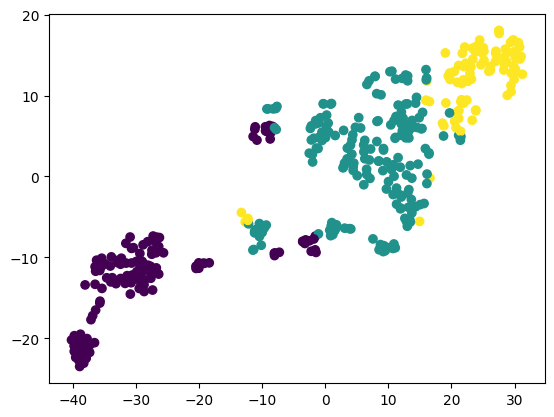

In [11]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)

plt.show()

Полученные кластеры имеют выраженные выбросы. Построим цетры кластеров из исходных данных и посмотрим распределение при большем количество кластеров.

In [12]:
labels_train2 = kmeans.fit_predict(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


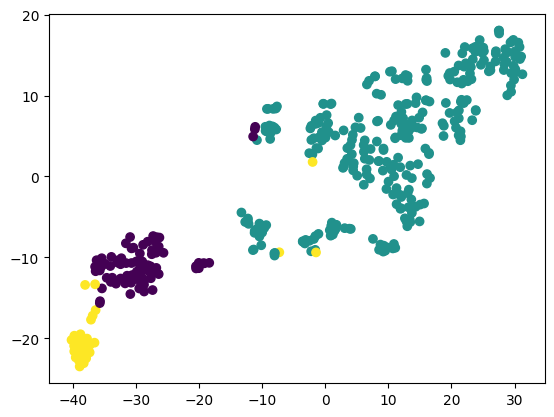

In [13]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train2)

plt.show()

In [14]:
kmeans2 = KMeans(n_clusters=4, max_iter=100, random_state=42)
labels_train3 = kmeans2.fit_predict(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


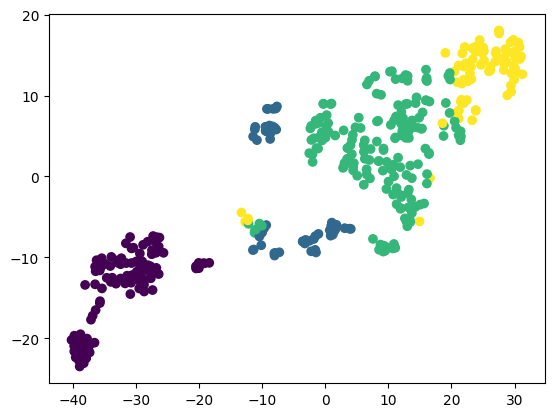

In [15]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train3)

plt.show()

При 4 кластерах распределение выглядит более структурированным, но дальнейшей работы сохраним исходные параметры задания с 3 кластерами.

In [16]:
price1 = y_train[labels_train == 0].mean().values[0]
price2 = y_train[labels_train == 1].mean().values[0]
price3 = y_train[labels_train == 2].mean().values[0]
crim1 = X_train["CRIM"][labels_train == 0].mean()
crim2 = X_train["CRIM"][labels_train == 1].mean()
crim3 = X_train["CRIM"][labels_train == 2].mean()


In [17]:
price11 = y_train[labels_train2 == 0].mean().values[0]
price21 = y_train[labels_train2 == 1].mean().values[0]
price31 = y_train[labels_train2 == 2].mean().values[0]
crim11 = X_train["CRIM"][labels_train2 == 0].mean()
crim21 = X_train["CRIM"][labels_train2 == 1].mean()
crim31 = X_train["CRIM"][labels_train2 == 2].mean()

In [18]:
print('Кластеризация при масштабировании данных \n')
print(f'Среднее значение для первого кластера : цена = {price1:.2f}, параметр CRIM = {crim1:.2f}')
print(f'Среднее значение для второго кластера : цена = {price2:.2f}, параметр CRIM = {crim2:.2f}')
print(f'Среднее значение для третьего кластера : цена = {price3:.2f}, параметр CRIM = {crim3:.2f}\n')
print('Кластеризация без масштабирования данных \n')
print(f'Среднее значение для первого кластера : цена = {price11:.2f}, параметр CRIM = {crim11:.2f}')
print(f'Среднее значение для второго кластера : цена = {price21:.2f}, параметр CRIM = {crim21:.2f}')
print(f'Среднее значение для третьего кластера : цена = {price31:.2f}, параметр CRIM = {crim31:.2f}')

Кластеризация при масштабировании данных 

Среднее значение для первого кластера : цена = 16.17, параметр CRIM = 10.80
Среднее значение для второго кластера : цена = 24.96, параметр CRIM = 0.42
Среднее значение для третьего кластера : цена = 27.79, параметр CRIM = 0.07

Кластеризация без масштабирования данных 

Среднее значение для первого кластера : цена = 17.44, параметр CRIM = 11.75
Среднее значение для второго кластера : цена = 25.17, параметр CRIM = 0.40
Среднее значение для третьего кластера : цена = 13.20, параметр CRIM = 14.36


### *Задание 3
+ Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

- Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [19]:
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [23]:
labels_test = kmeans.fit_predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


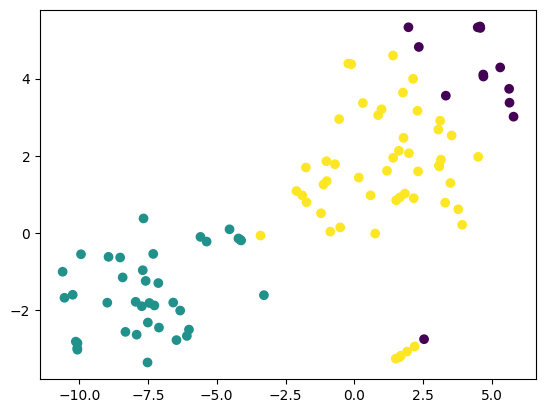

In [24]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c = labels_test)

plt.show()

In [25]:
price1_test = y_test[labels_test == 0].mean().values[0]
price2_test = y_test[labels_test == 1].mean().values[0]
price3_test = y_test[labels_test == 2].mean().values[0]
crim1_test = X_test["CRIM"][labels_test == 0].mean()
crim2_test = X_test["CRIM"][labels_test == 1].mean()
crim3_test = X_test["CRIM"][labels_test == 2].mean()

In [33]:
print(f'Среднее значение для первого кластера : цена = {price1_test:.2f}, параметр CRIM = {crim1_test:.2f}')
print(f'Среднее значение для второго кластера : цена = {price2_test:.2f}, параметр CRIM = {crim2_test:.2f}')
print(f'Среднее значение для третьего кластера : цена = {price3_test:.2f}, параметр CRIM = {crim3_test:.2f}')

Среднее значение для первого кластера : цена = 34.55, параметр CRIM = 0.08
Среднее значение для второго кластера : цена = 16.71, параметр CRIM = 9.42
Среднее значение для третьего кластера : цена = 21.72, параметр CRIM = 0.22
